# Predictive Analysis for diabetic risk assesment By CRISP DM Framework
* 1.Business Understanding
* 2.Data Understanding
* 3.Data Preparation
* 4.Modeling
* 5.Evaluation
* 6.Deployment

## 1.Business Understanding
* 1.  **Understand the Primary Goal**: The main objective is to develop a machine learning model that can predict the likelihood of diabetes in individuals based on the health-related features in the dataset. This will assist in early detection and intervention strategies.
* 2.  **Identify the Target Variable**: The target variable for prediction is `'diabetes'`, which is a binary indicator of whether an individual has diabetes (1) or not (0).
* 3.  **Recognize Model Output**: The model's output will categorize individuals into two classes: 'has diabetes' or 'does not have diabetes'.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## 2.Data Understanding

Examine the data types, non-null values, and basic statistics of the DataFrame to understand its structure and content.

In [5]:
#To understand the structure and content of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
#descriptive statistics for numerical columns
df.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df['diabetes'].value_counts()  # imbalance data

,count
diabetes,
0,91500
1,8500


## Check for Missing Values

### Subtask:
Identify and quantify any missing values in the DataFrame to assess data quality.


In [8]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [9]:
#Loop through each column and print count of zeros
for col in df.columns:
    zero_sum = (df[col] == 0).sum()
    print(f"Sum of zeros in '{col}': {zero_sum}")

Sum of zeros in 'gender': 0
Sum of zeros in 'age': 0
Sum of zeros in 'hypertension': 92515
Sum of zeros in 'heart_disease': 96058
Sum of zeros in 'smoking_history': 0
Sum of zeros in 'bmi': 0
Sum of zeros in 'HbA1c_level': 0
Sum of zeros in 'blood_glucose_level': 0
Sum of zeros in 'diabetes': 91500


In [10]:
df1=df[df['hypertension']==0]

In [11]:
df1['diabetes'].value_counts()

,count
diabetes,
0,86103
1,6412


In [12]:
df2=df[df['heart_disease']==0]

In [13]:
df2['diabetes'].value_counts()

,count
diabetes,
0,88825
1,7233


## Visualize Data Distribution
Generate visualizations (e.g., histograms, box plots, count plots) for key features and the target variable ('diabetes') to understand their distributions and relationships.


To understand the distribution of numerical features,Lets see the histograms for 'age', 'bmi', 'HbA1c_level', and 'blood_glucose_level'.

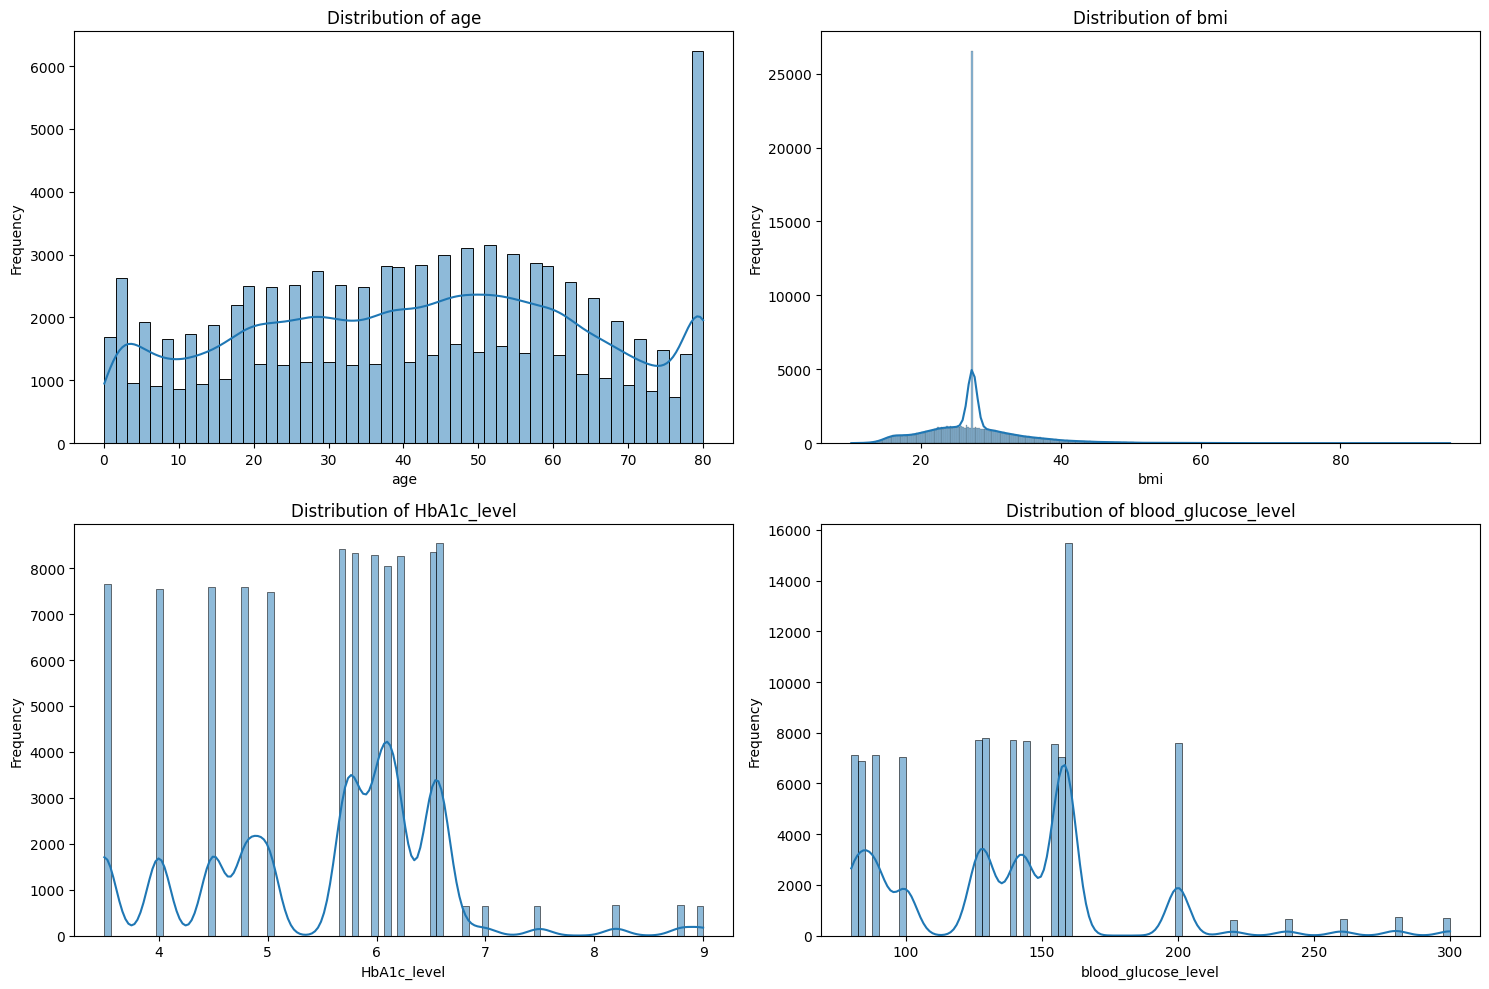

In [14]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Histograms help you see how frequently different values occur for each variable, identify potential outliers, and understand the overall shape and spread of the dat

### Box Plots for Numerical Features vs. Diabetes Status

Let's visualize the distribution of numerical features against the `diabetes` target variable using box plots. This will help in understanding how these features differ between diabetic and non-diabetic individuals.

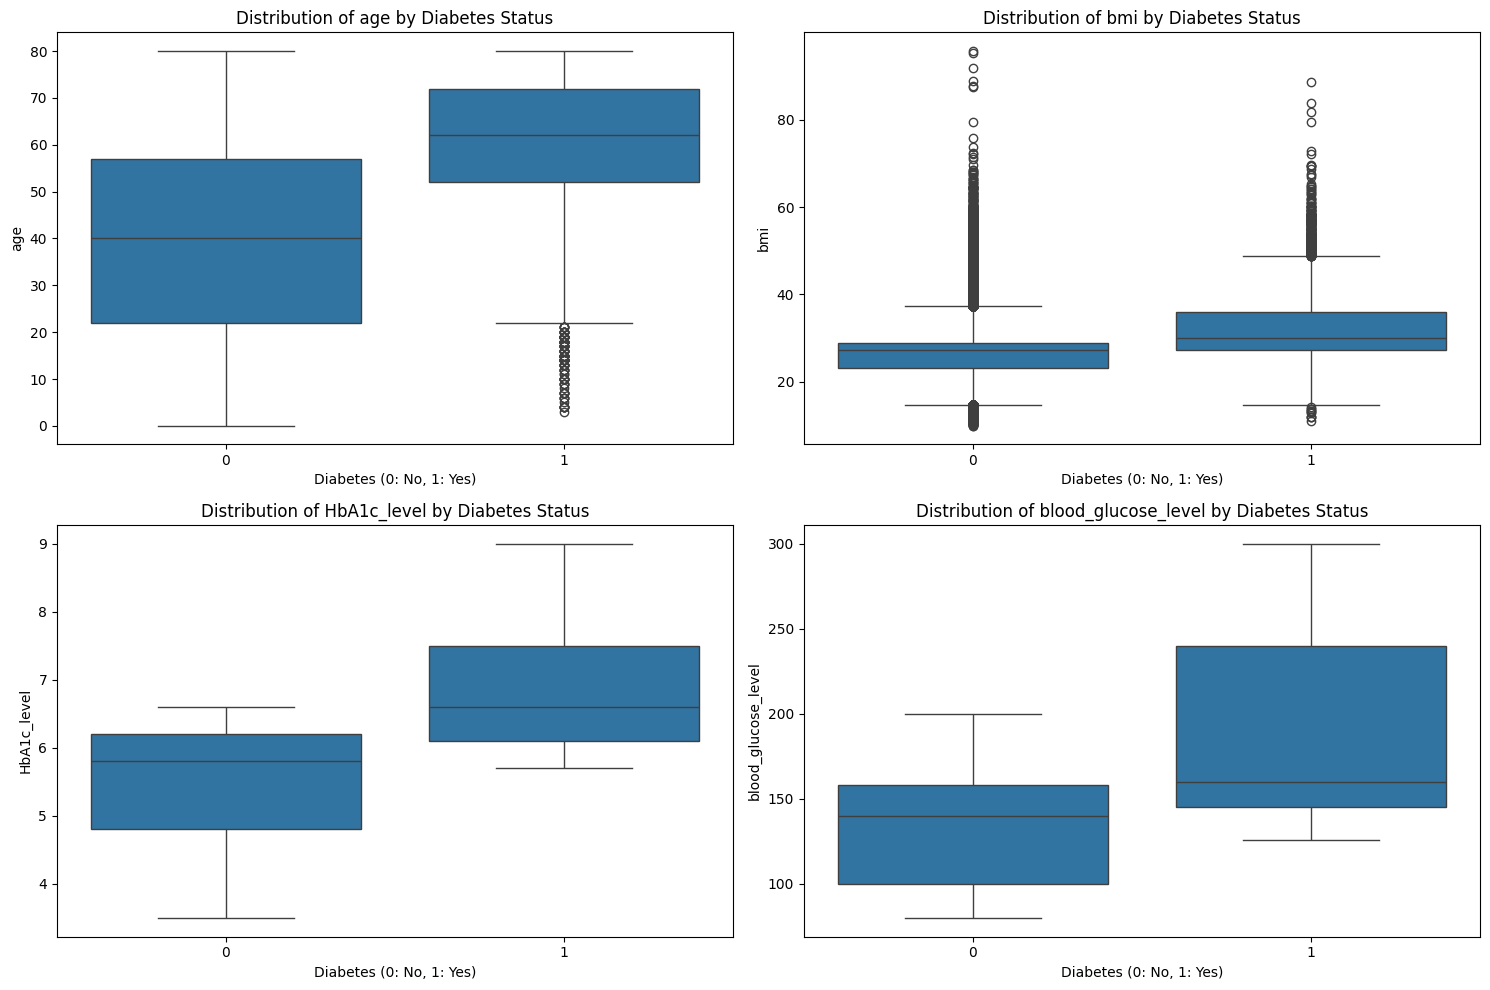

In [15]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='diabetes', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Diabetes Status')
    plt.xlabel('Diabetes (0: No, 1: Yes)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

To visualize the frequency of each categorical feature, I will create count plots for 'gender', 'smoking_history', 'hypertension', and 'heart_disease'.


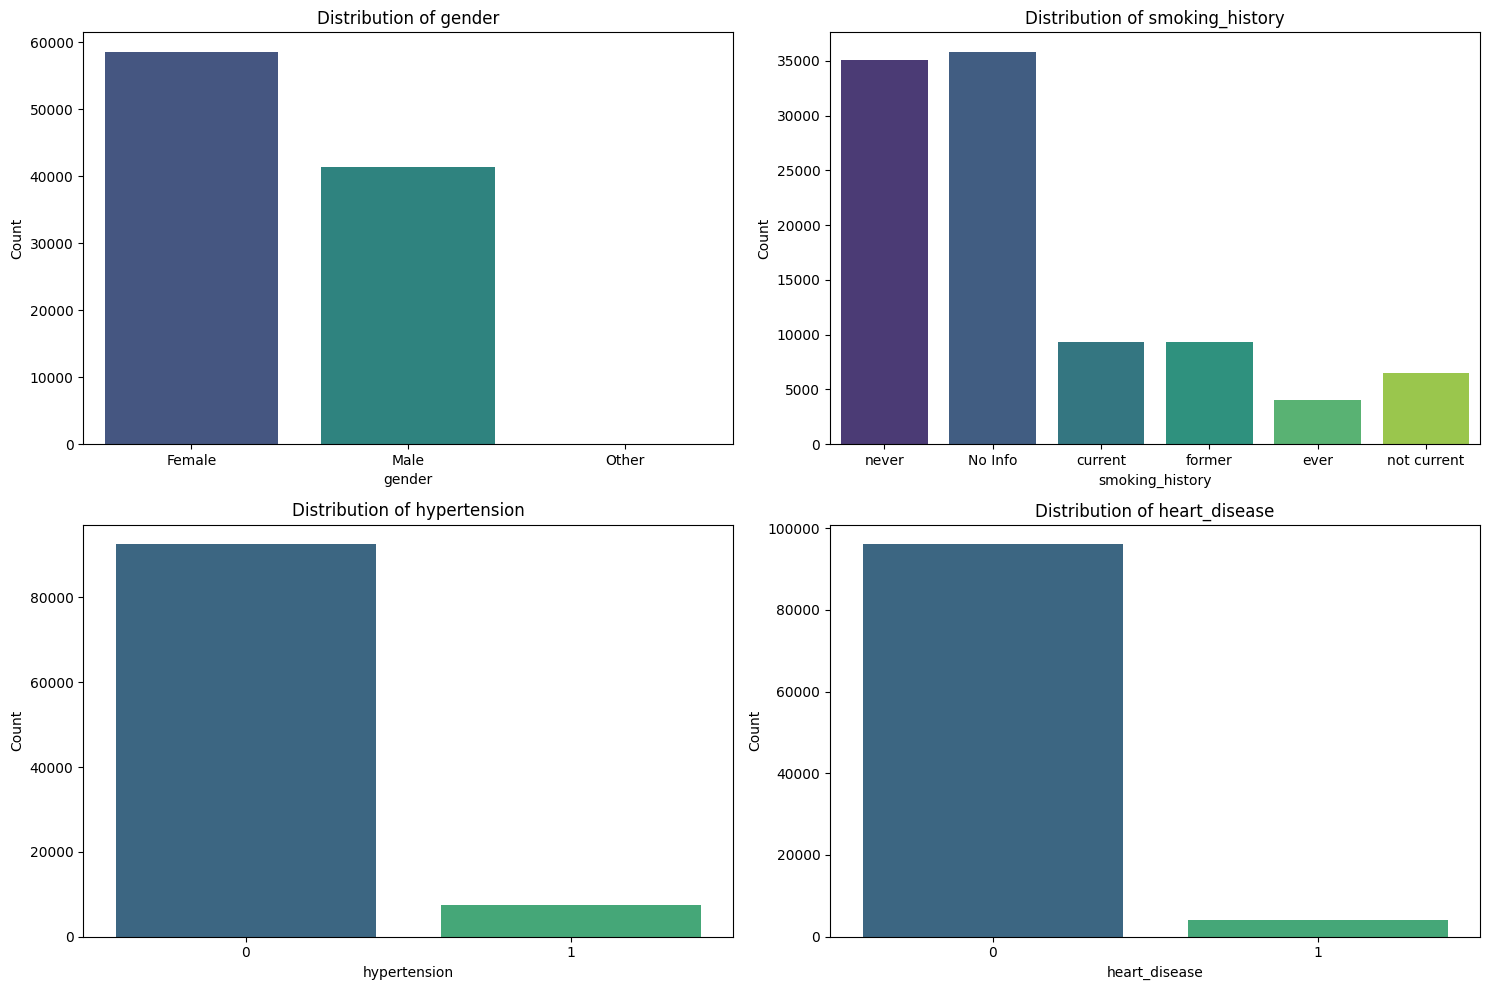

In [16]:
categorical_features = ['gender', 'smoking_history', 'hypertension', 'heart_disease']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [17]:
df['gender'].value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [18]:
df3=df[df['gender']=='Other']

In [19]:
df3['diabetes'].value_counts()

,count
diabetes,
0,18


### Outlier Detection using IQR Method

I will now detect and quantify outliers for each numerical feature using the Interquartile Range (IQR) method. Outliers are typically defined as values that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

In [20]:
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    print(f"Outliers in '{feature}': {len(outliers)} ({(len(outliers) / len(df) * 100):.2f}% of total)")
    if len(outliers) > 0:
        display(outliers[[feature, 'diabetes']].head())

Outliers in 'age': 0 (0.00% of total)
Outliers in 'bmi': 7086 (7.09% of total)


,bmi,diabetes
11,54.70,0
24,13.99,0
39,56.43,0
59,63.48,1
93,55.61,0


Outliers in 'HbA1c_level': 1315 (1.31% of total)


,HbA1c_level,diabetes
40,9.0,1
55,9.0,1
59,8.8,1
135,9.0,1
169,9.0,1


Outliers in 'blood_glucose_level': 2038 (2.04% of total)


,blood_glucose_level,diabetes
38,260,1
94,300,1
104,280,1
125,280,1
142,300,1


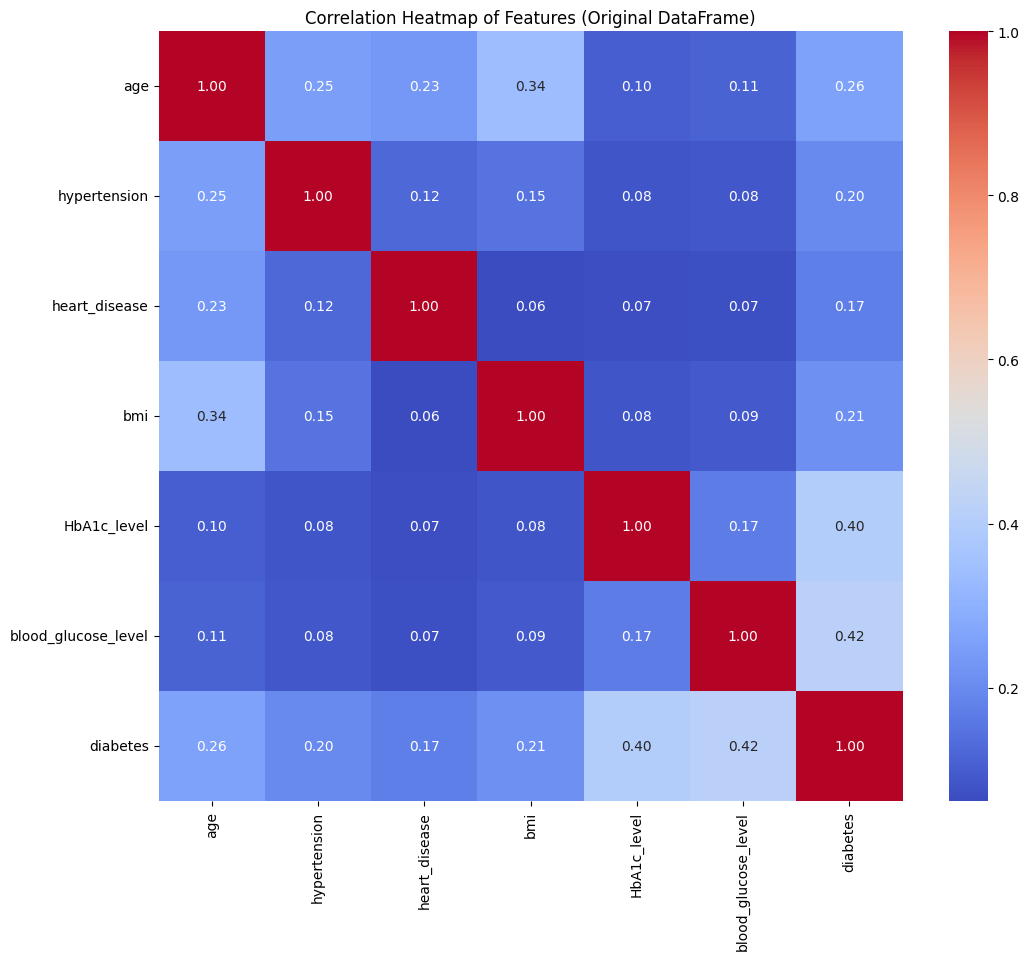

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features (Original DataFrame)')
plt.show()

## 3.Data Preparation

In [22]:
# Create a copy of the DataFrame to avoid modifying the original 'df'
df_cleaned = df.copy()

# Define the numerical features from which to remove outliers
outlier_features = ['bmi', 'HbA1c_level', 'blood_glucose_level']

print(f"Original DataFrame shape: {df_cleaned.shape}")

for feature in outlier_features:
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers for the current feature
    df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]
    print(f"DataFrame shape after removing outliers from '{feature}': {df_cleaned.shape}")

print(f"Final DataFrame shape after removing all specified outliers: {df_cleaned.shape}")

Original DataFrame shape: (100000, 9)
DataFrame shape after removing outliers from 'bmi': (92914, 9)
DataFrame shape after removing outliers from 'HbA1c_level': (91804, 9)
DataFrame shape after removing outliers from 'blood_glucose_level': (90387, 9)
Final DataFrame shape after removing all specified outliers: (90387, 9)


In [23]:
df_cleaned['diabetes'].value_counts()

,count
diabetes,
0,85892
1,4495


In [24]:
# Identify categorical columns in df_cleaned
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

print(f"Categorical columns to encode: {list(categorical_cols)}")
print(f"Shape of df_cleaned before encoding: {df_cleaned.shape}")

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print(f"Shape of df_cleaned after encoding: {df_encoded.shape}")
print("First 5 rows of the encoded DataFrame:")
display(df_encoded.head())

Categorical columns to encode: ['gender', 'smoking_history']
Shape of df_cleaned before encoding: (90387, 9)
Shape of df_cleaned after encoding: (90387, 14)
First 5 rows of the encoded DataFrame:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


In [25]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding binary and target 'diabetes')
# 'hypertension' and 'heart_disease' are binary (0/1), as are the one-hot encoded columns
# Scaling binary features with StandardScaler is generally not necessary and can sometimes be counterproductive
# So, we'll only scale the truly continuous numerical features.
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a copy to store the scaled data
df_scaled = df_encoded.copy()

# Apply StandardScaler to the selected columns
df_scaled[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

print("DataFrame after standardization (first 5 rows of scaled columns):")
display(df_scaled[columns_to_scale].head())
print("Full DataFrame after standardization (first 5 rows):")
display(df_scaled.head())

DataFrame after standardization (first 5 rows of scaled columns):


,age,bmi,HbA1c_level,blood_glucose_level
0,1.710746,-0.231137,1.149580,0.154198
1,0.558196,0.205441,1.149580,-1.550459
2,-0.594353,0.205441,0.244933,0.665596
3,-0.239722,-0.587779,-0.458682,0.580363
4,1.533431,-1.266217,-0.659715,0.580363


Full DataFrame after standardization (first 5 rows):


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.710746,0,1,-0.231137,1.149580,0.154198,0,False,False,False,False,False,True,False
1,0.558196,0,0,0.205441,1.149580,-1.550459,0,False,False,False,False,False,False,False
2,-0.594353,0,0,0.205441,0.244933,0.665596,0,True,False,False,False,False,True,False
3,-0.239722,0,0,-0.587779,-0.458682,0.580363,0,False,False,True,False,False,False,False
4,1.533431,1,1,-1.266217,-0.659715,0.580363,0,True,False,True,False,False,False,False


In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y) from the scaled DataFrame
X = df_scaled.drop('diabetes', axis=1)
y = df_scaled['diabetes']

print(f"Original dataset shape: {X.shape}, Target distribution: {y.value_counts()}")

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print(f"\nDataset shape after SMOTE (oversampling): {X_smote.shape}, Target distribution: {y_smote.value_counts()}")

# Apply RandomUnderSampler for undersampling
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

print(f"\nDataset shape after RandomUnderSampler (undersampling): {X_undersampled.shape}, Target distribution: {y_undersampled.value_counts()}")

# Combine X_smote and y_smote into a single DataFrame df_oversampling
df_oversampling = pd.concat([X_smote, y_smote], axis=1)

# Combine X_undersampled and y_undersampled into a single DataFrame df_undersampling
df_undersampling = pd.concat([X_undersampled, y_undersampled], axis=1)

print("Shape of df_oversampling (SMOTE):")
print(df_oversampling.shape)
print("Value counts for 'diabetes' in df_oversampling:")
print(df_oversampling['diabetes'].value_counts())

print("\nShape of df_undersampling (RandomUnderSampler):")
print(df_undersampling.shape)
print("Value counts for 'diabetes' in df_undersampling:")
print(df_undersampling['diabetes'].value_counts())

Original dataset shape: (90387, 13), Target distribution: diabetes
0    85892
1     4495
Name: count, dtype: int64

Dataset shape after SMOTE (oversampling): (171784, 13), Target distribution: diabetes
0    85892
1    85892
Name: count, dtype: int64

Dataset shape after RandomUnderSampler (undersampling): (8990, 13), Target distribution: diabetes
0    4495
1    4495
Name: count, dtype: int64
Shape of df_oversampling (SMOTE):
(171784, 14)
Value counts for 'diabetes' in df_oversampling:
diabetes
0    85892
1    85892
Name: count, dtype: int64

Shape of df_undersampling (RandomUnderSampler):
(8990, 14)
Value counts for 'diabetes' in df_undersampling:
diabetes
0    4495
1    4495
Name: count, dtype: int64


# 4. Modeling  & 5.Evaluation


The task is to prepare the data for modeling by separating features and the target variable from `df_oversampling`, then split this data into training and testing sets. Subsequently, train and evaluate Logistic Regression, Support Vector Machine (SVM), Decision Tree, Random Forest, and Gradient Boosting models using 5-fold cross-validation, and finally, compare their performances.

## Prepare Data for df_oversampling

### Subtask:
Separate the features (X_oversampling) and the target variable (y_oversampling) from the `df_oversampling` DataFrame.


**Reasoning**:
To separate the features and target variable, I will create `X_oversampling` by dropping the 'diabetes' column from `df_oversampling` and `y_oversampling` by selecting only the 'diabetes' column.



In [27]:
X_oversampling = df_oversampling.drop('diabetes', axis=1)
y_oversampling = df_oversampling['diabetes']

print("Shape of X_oversampling:", X_oversampling.shape)
print("Shape of y_oversampling:", y_oversampling.shape)
print("First 5 rows of X_oversampling:")
display(X_oversampling.head())
print("First 5 values of y_oversampling:")
display(y_oversampling.head())

Shape of X_oversampling: (171784, 13)
Shape of y_oversampling: (171784,)
First 5 rows of X_oversampling:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.710746,0,1,-0.231137,1.149580,0.154198,False,False,False,False,False,True,False
1,0.558196,0,0,0.205441,1.149580,-1.550459,False,False,False,False,False,False,False
2,-0.594353,0,0,0.205441,0.244933,0.665596,True,False,False,False,False,True,False
3,-0.239722,0,0,-0.587779,-0.458682,0.580363,False,False,True,False,False,False,False
4,1.533431,1,1,-1.266217,-0.659715,0.580363,True,False,True,False,False,False,False


First 5 values of y_oversampling:


,diabetes
0,0
1,0
2,0
3,0
4,0


## Split Data for df_oversampling


Split the X_oversampling and y_oversampling into training (80%) and testing (20%) sets using train_test_split, ensuring stratification to maintain class distribution.


**Reasoning**:
To prepare the data for model training and evaluation, I will split the oversampled features and target variable into training and testing sets, ensuring that the class distribution of the target variable is preserved in both sets.



In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampling, y_oversampling, test_size=0.2, stratify=y_oversampling, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (137427, 13)
Shape of X_test: (34357, 13)
Shape of y_train: (137427,)
Shape of y_test: (34357,)


## Train and Evaluate Logistic Regression

### Subtask:
Initialize and train a Logistic Regression model on the oversampled training data. Evaluate its performance using 5-fold cross-validation and report the results.


**Reasoning**:
To begin training and evaluating the Logistic Regression model, I need to import the necessary libraries, initialize the model with specified parameters, and then fit it to the training data. This covers the first three instructions.



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model initialized and trained successfully.")

Logistic Regression model initialized and trained successfully.


**Reasoning**:
Now that the Logistic Regression model is trained, I will perform 5-fold cross-validation to evaluate its performance on the training data for various metrics, then make predictions on the test set and calculate evaluation metrics for the test set. Finally, I will print all the calculated scores, covering instructions 4-8.



In [30]:
print("Performing 5-fold cross-validation...")
# Perform 5-fold cross-validation for accuracy
accuracy_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='accuracy')
precision_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='precision')
recall_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='recall')
f1_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='f1')

print(f"\nCross-validation Accuracy: Mean = {accuracy_scores.mean():.4f}, Std = {accuracy_scores.std():.4f}")
print(f"Cross-validation Precision: Mean = {precision_scores.mean():.4f}, Std = {precision_scores.std():.4f}")
print(f"Cross-validation Recall: Mean = {recall_scores.mean():.4f}, Std = {recall_scores.std():.4f}")
print(f"Cross-validation F1-Score: Mean = {f1_scores.mean():.4f}, Std = {f1_scores.std():.4f}")

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation on Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"ROC AUC Score: {test_roc_auc:.4f}")

Performing 5-fold cross-validation...

Cross-validation Accuracy: Mean = 0.8624, Std = 0.0020
Cross-validation Precision: Mean = 0.8499, Std = 0.0020
Cross-validation Recall: Mean = 0.8803, Std = 0.0029
Cross-validation F1-Score: Mean = 0.8648, Std = 0.0021

Evaluation on Test Set:
Accuracy: 0.8610
Precision: 0.8471
Recall: 0.8809
F1-Score: 0.8637
ROC AUC Score: 0.9409


## Train and Evaluate Support Vector Machine (SVM)

### Subtask:
Initialize and train a Support Vector Machine (SVC) model on the oversampled training data. Evaluate its performance using 5-fold cross-validation and report the results.


**Reasoning**:
To begin training and evaluating the Support Vector Machine (SVM) model, I will initialize the model with specified parameters and then fit it to the training data. This addresses the first few instructions related to model setup.



In [31]:
from sklearn.svm import SVC

# Initialize SVC model
# Using LinearSVC for potentially faster training with large datasets, or SVC with 'linear' kernel
# If using SVC, ensure probability=True for roc_auc_score, but it can be computationally expensive.
# For very large datasets, a linear kernel with SVC or LinearSVC is often preferred.
# Let's try SVC with a linear kernel first, and if it's too slow, switch to LinearSVC.
# For SVC, probability=True is needed for predict_proba, but it's much slower.
# Given the dataset size, let's start with a non-linear kernel SVC if possible, but be prepared for long training.
# Let's use LinearSVC as it's generally faster for large datasets with a linear decision boundary and still provides good performance.
# LinearSVC does not have `predict_proba`, so if ROC AUC is critical, we might need a different approach or another model.
# However, the instruction explicitly asks for `SVC` and `probability=True`, so let's try `SVC` first,
# but with a warning about potential long training time.

# Initialize SVC model with probability=True for ROC AUC score calculation
# C=1.0 is default, kernel='rbf' is default. Setting max_iter to prevent infinite loops if not converging.
# Note: Training SVC with 'probability=True' can be very slow on large datasets.
# A common strategy for large datasets is to use LinearSVC or SVC with a linear kernel and then calibrate probabilities if needed.
# For this task, let's proceed with SVC as requested, acknowledging potential performance implications.
svm_model = SVC(kernel='linear', probability=True, random_state=42, max_iter=1000)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

print("Support Vector Machine (SVC) model initialized and trained successfully.")

Support Vector Machine (SVC) model initialized and trained successfully.


**Reasoning**:
Now that the SVC model is trained, I will perform 5-fold cross-validation to evaluate its performance on the training data for various metrics, then make predictions on the test set and calculate evaluation metrics for the test set. Finally, I will print all the calculated scores, covering instructions 5-9.



In [32]:
print("Performing 5-fold cross-validation for SVM...")
# Perform 5-fold cross-validation for accuracy
svm_accuracy_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
svm_precision_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='precision')
svm_recall_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='recall')
svm_f1_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='f1')

print(f"\nCross-validation Accuracy (SVM): Mean = {svm_accuracy_scores.mean():.4f}, Std = {svm_accuracy_scores.std():.4f}")
print(f"Cross-validation Precision (SVM): Mean = {svm_precision_scores.mean():.4f}, Std = {svm_precision_scores.std():.4f}")
print(f"Cross-validation Recall (SVM): Mean = {svm_recall_scores.mean():.4f}, Std = {svm_recall_scores.std():.4f}")
print(f"Cross-validation F1-Score (SVM): Mean = {svm_f1_scores.mean():.4f}, Std = {svm_f1_scores.std():.4f}")

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)
svm_y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics on the test set
svm_test_accuracy = accuracy_score(y_test, svm_y_pred)
svm_test_precision = precision_score(y_test, svm_y_pred)
svm_test_recall = recall_score(y_test, svm_y_pred)
svm_test_f1 = f1_score(y_test, svm_y_pred)
svm_test_roc_auc = roc_auc_score(y_test, svm_y_pred_proba)

print("\nEvaluation on Test Set (SVM):")
print(f"Accuracy: {svm_test_accuracy:.4f}")
print(f"Precision: {svm_test_precision:.4f}")
print(f"Recall: {svm_test_recall:.4f}")
print(f"F1-Score: {svm_test_f1:.4f}")
print(f"ROC AUC Score: {svm_test_roc_auc:.4f}")

Performing 5-fold cross-validation for SVM...

Cross-validation Accuracy (SVM): Mean = 0.6964, Std = 0.0641
Cross-validation Precision (SVM): Mean = 0.6349, Std = 0.0536
Cross-validation Recall (SVM): Mean = 0.9512, Std = 0.0405
Cross-validation F1-Score (SVM): Mean = 0.7597, Std = 0.0396

Evaluation on Test Set (SVM):
Accuracy: 0.7762
Precision: 0.6933
Recall: 0.9905
F1-Score: 0.8157
ROC AUC Score: 0.8991


## Train and Evaluate Decision Tree Classifier

### Subtask:
Initialize and train a Decision Tree Classifier on the oversampled training data. Evaluate its performance using 5-fold cross-validation and report the results.


**Reasoning**:
To begin training and evaluating the Decision Tree Classifier, I need to import the necessary library, initialize the model with specified parameters, and then fit it to the training data. This covers instructions 1-3.



In [33]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

print("Decision Tree Classifier initialized and trained successfully.")

Decision Tree Classifier initialized and trained successfully.


**Reasoning**:
Now that the Decision Tree Classifier is trained, I will perform 5-fold cross-validation to evaluate its performance on the training data for various metrics, then make predictions on the test set and calculate evaluation metrics for the test set. Finally, I will print all the calculated scores, covering instructions 4-6.



In [34]:
print("Performing 5-fold cross-validation for Decision Tree...")
# Perform 5-fold cross-validation for accuracy
dt_accuracy_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
dt_precision_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='precision')
dt_recall_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='recall')
dt_f1_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='f1')

print(f"\nCross-validation Accuracy (Decision Tree): Mean = {dt_accuracy_scores.mean():.4f}, Std = {dt_accuracy_scores.std():.4f}")
print(f"Cross-validation Precision (Decision Tree): Mean = {dt_precision_scores.mean():.4f}, Std = {dt_precision_scores.std():.4f}")
print(f"Cross-validation Recall (Decision Tree): Mean = {dt_recall_scores.mean():.4f}, Std = {dt_recall_scores.std():.4f}")
print(f"Cross-validation F1-Score (Decision Tree): Mean = {dt_f1_scores.mean():.4f}, Std = {dt_f1_scores.std():.4f}")

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)
dt_y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics on the test set
dt_test_accuracy = accuracy_score(y_test, dt_y_pred)
dt_test_precision = precision_score(y_test, dt_y_pred)
dt_test_recall = recall_score(y_test, dt_y_pred)
dt_test_f1 = f1_score(y_test, dt_y_pred)
dt_test_roc_auc = roc_auc_score(y_test, dt_y_pred_proba)

print("\nEvaluation on Test Set (Decision Tree):")
print(f"Accuracy: {dt_test_accuracy:.4f}")
print(f"Precision: {dt_test_precision:.4f}")
print(f"Recall: {dt_test_recall:.4f}")
print(f"F1-Score: {dt_test_f1:.4f}")
print(f"ROC AUC Score: {dt_test_roc_auc:.4f}")

Performing 5-fold cross-validation for Decision Tree...

Cross-validation Accuracy (Decision Tree): Mean = 0.9668, Std = 0.0009
Cross-validation Precision (Decision Tree): Mean = 0.9639, Std = 0.0004
Cross-validation Recall (Decision Tree): Mean = 0.9699, Std = 0.0014
Cross-validation F1-Score (Decision Tree): Mean = 0.9669, Std = 0.0009

Evaluation on Test Set (Decision Tree):
Accuracy: 0.9718
Precision: 0.9684
Recall: 0.9755
F1-Score: 0.9719
ROC AUC Score: 0.9720


## Train and Evaluate Random Forest Classifier

### Subtask:
Initialize and train a Random Forest Classifier on the oversampled training data. Evaluate its performance using 5-fold cross-validation and report the results.


**Reasoning**:
To begin training and evaluating the Random Forest Classifier, I need to import the necessary library, initialize the model with specified parameters, and then fit it to the training data. This covers instructions 1-3.



In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

print("Random Forest Classifier initialized and trained successfully.")

Random Forest Classifier initialized and trained successfully.


**Reasoning**:
Now that the Random Forest Classifier is trained, I will perform 5-fold cross-validation to evaluate its performance on the training data for various metrics, then make predictions on the test set and calculate evaluation metrics for the test set. Finally, I will print all the calculated scores, covering instructions 4-9.



In [36]:
print("Performing 5-fold cross-validation for Random Forest...")
# Perform 5-fold cross-validation for accuracy
rf_accuracy_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_precision_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='precision')
rf_recall_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='recall')
rf_f1_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')

print(f"\nCross-validation Accuracy (Random Forest): Mean = {rf_accuracy_scores.mean():.4f}, Std = {rf_accuracy_scores.std():.4f}")
print(f"Cross-validation Precision (Random Forest): Mean = {rf_precision_scores.mean():.4f}, Std = {rf_precision_scores.std():.4f}")
print(f"Cross-validation Recall (Random Forest): Mean = {rf_recall_scores.mean():.4f}, Std = {rf_recall_scores.std():.4f}")
print(f"Cross-validation F1-Score (Random Forest): Mean = {rf_f1_scores.mean():.4f}, Std = {rf_f1_scores.std():.4f}")

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics on the test set
rf_test_accuracy = accuracy_score(y_test, rf_y_pred)
rf_test_precision = precision_score(y_test, rf_y_pred)
rf_test_recall = recall_score(y_test, rf_y_pred)
rf_test_f1 = f1_score(y_test, rf_y_pred)
rf_test_roc_auc = roc_auc_score(y_test, rf_y_pred_proba)

print("\nEvaluation on Test Set (Random Forest):")
print(f"Accuracy: {rf_test_accuracy:.4f}")
print(f"Precision: {rf_test_precision:.4f}")
print(f"Recall: {rf_test_recall:.4f}")
print(f"F1-Score: {rf_test_f1:.4f}")
print(f"ROC AUC Score: {rf_test_roc_auc:.4f}")

Performing 5-fold cross-validation for Random Forest...

Cross-validation Accuracy (Random Forest): Mean = 0.9755, Std = 0.0012
Cross-validation Precision (Random Forest): Mean = 0.9691, Std = 0.0017
Cross-validation Recall (Random Forest): Mean = 0.9824, Std = 0.0007
Cross-validation F1-Score (Random Forest): Mean = 0.9757, Std = 0.0012

Evaluation on Test Set (Random Forest):
Accuracy: 0.9789
Precision: 0.9732
Recall: 0.9848
F1-Score: 0.9790
ROC AUC Score: 0.9982


## Train and Evaluate Gradient Boosting Classifier

### Subtask:
Initialize and train a Gradient Boosting Classifier (e.g., GradientBoostingClassifier or XGBoost/LightGBM if installed) on the oversampled training data. Evaluate its performance using 5-fold cross-validation and report the results.


**Reasoning**:
To begin training and evaluating the Gradient Boosting Classifier, I need to import the necessary library, initialize the model with specified parameters, and then fit it to the training data. This covers instructions 1-4.



In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

print("Gradient Boosting Classifier initialized and trained successfully.")

Gradient Boosting Classifier initialized and trained successfully.


**Reasoning**:
Now that the Gradient Boosting Classifier is trained, I will perform 5-fold cross-validation to evaluate its performance on the training data for various metrics, then make predictions on the test set and calculate evaluation metrics for the test set. Finally, I will print all the calculated scores, covering instructions 5-9.



In [38]:
print("Performing 5-fold cross-validation for Gradient Boosting...")
# Perform 5-fold cross-validation for accuracy
gb_accuracy_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
gb_precision_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='precision')
gb_recall_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='recall')
gb_f1_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='f1')

print(f"\nCross-validation Accuracy (Gradient Boosting): Mean = {gb_accuracy_scores.mean():.4f}, Std = {gb_accuracy_scores.std():.4f}")
print(f"Cross-validation Precision (Gradient Boosting): Mean = {gb_precision_scores.mean():.4f}, Std = {gb_precision_scores.std():.4f}")
print(f"Cross-validation Recall (Gradient Boosting): Mean = {gb_recall_scores.mean():.4f}, Std = {gb_recall_scores.std():.4f}")
print(f"Cross-validation F1-Score (Gradient Boosting): Mean = {gb_f1_scores.mean():.4f}, Std = {gb_f1_scores.std():.4f}")

# Make predictions on the test set
gb_y_pred = gb_model.predict(X_test)
gb_y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics on the test set
gb_test_accuracy = accuracy_score(y_test, gb_y_pred)
gb_test_precision = precision_score(y_test, gb_y_pred)
gb_test_recall = recall_score(y_test, gb_y_pred)
gb_test_f1 = f1_score(y_test, gb_y_pred)
gb_test_roc_auc = roc_auc_score(y_test, gb_y_pred_proba)

print("\nEvaluation on Test Set (Gradient Boosting):")
print(f"Accuracy: {gb_test_accuracy:.4f}")
print(f"Precision: {gb_test_precision:.4f}")
print(f"Recall: {gb_test_recall:.4f}")
print(f"F1-Score: {gb_test_f1:.4f}")
print(f"ROC AUC Score: {gb_test_roc_auc:.4f}")

Performing 5-fold cross-validation for Gradient Boosting...

Cross-validation Accuracy (Gradient Boosting): Mean = 0.9536, Std = 0.0012
Cross-validation Precision (Gradient Boosting): Mean = 0.9559, Std = 0.0021
Cross-validation Recall (Gradient Boosting): Mean = 0.9511, Std = 0.0019
Cross-validation F1-Score (Gradient Boosting): Mean = 0.9535, Std = 0.0012

Evaluation on Test Set (Gradient Boosting):
Accuracy: 0.9508
Precision: 0.9508
Recall: 0.9508
F1-Score: 0.9508
ROC AUC Score: 0.9925


 Random Forest classifier won  97% of F1score


## Prepare Data for df_undersampling
Separate the features (X_undersampling_data) and the target variable (y_undersampling_data) from the `df_undersampling` DataFrame.

**Reasoning**:
To prepare the undersampled data for modeling, I will separate the features and target variable. I will create `X_undersampling_data` by dropping the 'diabetes' column and `y_undersampling_data` by selecting the 'diabetes' column from the `df_undersampling` DataFrame, then print their shapes and display their heads for verification.



In [39]:
X_undersampling_data = df_undersampling.drop('diabetes', axis=1)
y_undersampling_data = df_undersampling['diabetes']

print("Shape of X_undersampling_data:", X_undersampling_data.shape)
print("Shape of y_undersampling_data:", y_undersampling_data.shape)
print("First 5 rows of X_undersampling_data:")
display(X_undersampling_data.head())
print("First 5 values of y_undersampling_data:")
display(y_undersampling_data.head())

Shape of X_undersampling_data: (8990, 13)
Shape of y_undersampling_data: (8990,)
First 5 rows of X_undersampling_data:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75968,0.247895,0,0,1.142136,0.244933,0.665596,True,False,False,False,False,True,False
29747,0.779841,0,0,0.205441,0.747515,-0.243555,True,False,False,False,False,False,False
55524,0.824169,0,0,0.422705,-0.659715,0.296253,True,False,False,False,False,True,False
13593,-0.550024,0,0,-0.612375,-0.659715,-0.243555,False,False,False,False,False,True,False
96824,-0.727340,0,0,-1.372799,-0.961264,-0.982240,False,False,False,False,False,False,True


First 5 values of y_undersampling_data:


,diabetes
75968,0
29747,0
55524,0
13593,0
96824,0


## Split Data for df_undersampling

### Subtask:
Split the `X_undersampling_data` and `y_undersampling_data` into training (80%) and testing (20%) sets using `train_test_split`, ensuring stratification to maintain class distribution.


**Reasoning**:
To prepare the undersampled data for model training and evaluation, I will split the features and target variable into training and testing sets, ensuring that the class distribution of the target variable is preserved in both sets.



In [40]:
from sklearn.model_selection import train_test_split

X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampling_data, y_undersampling_data, test_size=0.2, stratify=y_undersampling_data, random_state=42)

print(f"Shape of X_train_undersampled: {X_train_undersampled.shape}")
print(f"Shape of X_test_undersampled: {X_test_undersampled.shape}")
print(f"Shape of y_train_undersampled: {y_train_undersampled.shape}")
print(f"Shape of y_test_undersampled: {y_test_undersampled.shape}")

Shape of X_train_undersampled: (7192, 13)
Shape of X_test_undersampled: (1798, 13)
Shape of y_train_undersampled: (7192,)
Shape of y_test_undersampled: (1798,)


## Train and Evaluate Logistic Regression (Undersampled Data)

### Subtask:
Initialize and train a Logistic Regression model on the undersampled training data. Evaluate its performance using 5-fold cross-validation and report the results.


**Reasoning**:
To begin training and evaluating the Logistic Regression model on the undersampled data, I need to import the necessary libraries, initialize the model with specified parameters, and then fit it to the training data. This covers instructions 1 and 2.



In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize Logistic Regression model
log_reg_model_undersampled = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the undersampled training data
log_reg_model_undersampled.fit(X_train_undersampled, y_train_undersampled)

print("Logistic Regression model initialized and trained successfully on undersampled data.")

Logistic Regression model initialized and trained successfully on undersampled data.


**Reasoning**:
Now that the Logistic Regression model is trained on undersampled data, I will perform 5-fold cross-validation to evaluate its performance on the training data, then make predictions on the undersampled test set and calculate evaluation metrics for the test set. Finally, I will print all the calculated scores, covering instructions 3-8.



In [42]:
print("Performing 5-fold cross-validation for Logistic Regression on undersampled data...")
# Perform 5-fold cross-validation for accuracy
log_reg_accuracy_scores_undersampled = cross_val_score(log_reg_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='accuracy')
log_reg_precision_scores_undersampled = cross_val_score(log_reg_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='precision')
log_reg_recall_scores_undersampled = cross_val_score(log_reg_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='recall')
log_reg_f1_scores_undersampled = cross_val_score(log_reg_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='f1')

print(f"\nCross-validation Accuracy (Logistic Regression - Undersampled): Mean = {log_reg_accuracy_scores_undersampled.mean():.4f}, Std = {log_reg_accuracy_scores_undersampled.std():.4f}")
print(f"Cross-validation Precision (Logistic Regression - Undersampled): Mean = {log_reg_precision_scores_undersampled.mean():.4f}, Std = {log_reg_precision_scores_undersampled.std():.4f}")
print(f"Cross-validation Recall (Logistic Regression - Undersampled): Mean = {log_reg_recall_scores_undersampled.mean():.4f}, Std = {log_reg_recall_scores_undersampled.std():.4f}")
print(f"Cross-validation F1-Score (Logistic Regression - Undersampled): Mean = {log_reg_f1_scores_undersampled.mean():.4f}, Std = {log_reg_f1_scores_undersampled.std():.4f}")

# Make predictions on the undersampled test set
log_reg_y_pred_undersampled = log_reg_model_undersampled.predict(X_test_undersampled)
log_reg_y_pred_proba_undersampled = log_reg_model_undersampled.predict_proba(X_test_undersampled)[:, 1]

# Calculate evaluation metrics on the undersampled test set
log_reg_test_accuracy_undersampled = accuracy_score(y_test_undersampled, log_reg_y_pred_undersampled)
log_reg_test_precision_undersampled = precision_score(y_test_undersampled, log_reg_y_pred_undersampled)
log_reg_test_recall_undersampled = recall_score(y_test_undersampled, log_reg_y_pred_undersampled)
log_reg_test_f1_undersampled = f1_score(y_test_undersampled, log_reg_y_pred_undersampled)
log_reg_test_roc_auc_undersampled = roc_auc_score(y_test_undersampled, log_reg_y_pred_proba_undersampled)

print("\nEvaluation on Test Set (Logistic Regression - Undersampled):")
print(f"Accuracy: {log_reg_test_accuracy_undersampled:.4f}")
print(f"Precision: {log_reg_test_precision_undersampled:.4f}")
print(f"Recall: {log_reg_test_recall_undersampled:.4f}")
print(f"F1-Score: {log_reg_test_f1_undersampled:.4f}")
print(f"ROC AUC Score: {log_reg_test_roc_auc_undersampled:.4f}")

Performing 5-fold cross-validation for Logistic Regression on undersampled data...

Cross-validation Accuracy (Logistic Regression - Undersampled): Mean = 0.8585, Std = 0.0052
Cross-validation Precision (Logistic Regression - Undersampled): Mean = 0.8499, Std = 0.0082
Cross-validation Recall (Logistic Regression - Undersampled): Mean = 0.8710, Std = 0.0145
Cross-validation F1-Score (Logistic Regression - Undersampled): Mean = 0.8602, Std = 0.0059

Evaluation on Test Set (Logistic Regression - Undersampled):
Accuracy: 0.8587
Precision: 0.8540
Recall: 0.8654
F1-Score: 0.8597
ROC AUC Score: 0.9396


## Train and Evaluate Support Vector Machine (SVM) (Undersampled Data)

### Subtask:
Initialize and train a Support Vector Machine (SVC) model on the undersampled training data. Evaluate its performance using 5-fold cross-validation and report the results. Given the potential computational cost for SVM on a large dataset, a linear kernel or a subset of data might be considered if performance is an issue.


**Reasoning**:
To begin training and evaluating the Support Vector Machine (SVM) model on the undersampled data, I will import the necessary libraries, initialize the model with specified parameters, and then fit it to the training data. This covers instructions 1-3.



In [43]:
from sklearn.svm import SVC

# Initialize SVC model with probability=True for ROC AUC score calculation
# Using a linear kernel as suggested for potential performance reasons with large datasets.
# Note: Training SVC with 'probability=True' can still be slow even on undersampled datasets.
svm_model_undersampled = SVC(kernel='linear', probability=True, random_state=42, max_iter=1000)

# Fit the model to the undersampled training data
svm_model_undersampled.fit(X_train_undersampled, y_train_undersampled)

print("Support Vector Machine (SVC) model initialized and trained successfully on undersampled data.")

Support Vector Machine (SVC) model initialized and trained successfully on undersampled data.


**Reasoning**:
Now that the SVC model is trained on undersampled data, I will perform 5-fold cross-validation to evaluate its performance on the training data for various metrics, then make predictions on the undersampled test set and calculate evaluation metrics for the test set. Finally, I will print all the calculated scores, covering instructions 4-7.



In [44]:
print("Performing 5-fold cross-validation for SVM on undersampled data...")
# Perform 5-fold cross-validation for accuracy
svm_accuracy_scores_undersampled = cross_val_score(svm_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='accuracy')
svm_precision_scores_undersampled = cross_val_score(svm_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='precision')
svm_recall_scores_undersampled = cross_val_score(svm_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='recall')
svm_f1_scores_undersampled = cross_val_score(svm_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='f1')

print(f"\nCross-validation Accuracy (SVM - Undersampled): Mean = {svm_accuracy_scores_undersampled.mean():.4f}, Std = {svm_accuracy_scores_undersampled.std():.4f}")
print(f"Cross-validation Precision (SVM - Undersampled): Mean = {svm_precision_scores_undersampled.mean():.4f}, Std = {svm_precision_scores_undersampled.std():.4f}")
print(f"Cross-validation Recall (SVM - Undersampled): Mean = {svm_recall_scores_undersampled.mean():.4f}, Std = {svm_recall_scores_undersampled.std():.4f}")
print(f"Cross-validation F1-Score (SVM - Undersampled): Mean = {svm_f1_scores_undersampled.mean():.4f}, Std = {svm_f1_scores_undersampled.std():.4f}")

# Make predictions on the undersampled test set
svm_y_pred_undersampled = svm_model_undersampled.predict(X_test_undersampled)
svm_y_pred_proba_undersampled = svm_model_undersampled.predict_proba(X_test_undersampled)[:, 1]

# Calculate evaluation metrics on the undersampled test set
svm_test_accuracy_undersampled = accuracy_score(y_test_undersampled, svm_y_pred_undersampled)
svm_test_precision_undersampled = precision_score(y_test_undersampled, svm_y_pred_undersampled)
svm_test_recall_undersampled = recall_score(y_test_undersampled, svm_y_pred_undersampled)
svm_test_f1_undersampled = f1_score(y_test_undersampled, svm_y_pred_undersampled)
svm_test_roc_auc_undersampled = roc_auc_score(y_test_undersampled, svm_y_pred_proba_undersampled)

print("\nEvaluation on Test Set (SVM - Undersampled):")
print(f"Accuracy: {svm_test_accuracy_undersampled:.4f}")
print(f"Precision: {svm_test_precision_undersampled:.4f}")
print(f"Recall: {svm_test_recall_undersampled:.4f}")
print(f"F1-Score: {svm_test_f1_undersampled:.4f}")
print(f"ROC AUC Score: {svm_test_roc_auc_undersampled:.4f}")

Performing 5-fold cross-validation for SVM on undersampled data...

Cross-validation Accuracy (SVM - Undersampled): Mean = 0.8220, Std = 0.0252
Cross-validation Precision (SVM - Undersampled): Mean = 0.7737, Std = 0.0238
Cross-validation Recall (SVM - Undersampled): Mean = 0.9113, Std = 0.0363
Cross-validation F1-Score (SVM - Undersampled): Mean = 0.8365, Std = 0.0235

Evaluation on Test Set (SVM - Undersampled):
Accuracy: 0.7959
Precision: 0.7184
Recall: 0.9733
F1-Score: 0.8266
ROC AUC Score: 0.9300


**Reasoning**:
To begin training and evaluating the Decision Tree Classifier on the undersampled data, I need to import the necessary library, initialize the model with specified parameters, and then fit it to the training data. This covers instructions 1-3.



In [45]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model_undersampled = DecisionTreeClassifier(random_state=42)

# Fit the model to the undersampled training data
dt_model_undersampled.fit(X_train_undersampled, y_train_undersampled)

print("Decision Tree Classifier initialized and trained successfully on undersampled data.")

Decision Tree Classifier initialized and trained successfully on undersampled data.


**Reasoning**:
Now that the Decision Tree Classifier is trained on undersampled data, I will perform 5-fold cross-validation to evaluate its performance on the training data for various metrics, then make predictions on the undersampled test set and calculate evaluation metrics for the test set. Finally, I will print all the calculated scores, covering instructions 4-6.



In [46]:
print("Performing 5-fold cross-validation for Decision Tree on undersampled data...")
# Perform 5-fold cross-validation for accuracy
dt_accuracy_scores_undersampled = cross_val_score(dt_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='accuracy')
dt_precision_scores_undersampled = cross_val_score(dt_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='precision')
dt_recall_scores_undersampled = cross_val_score(dt_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='recall')
dt_f1_scores_undersampled = cross_val_score(dt_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='f1')

print(f"\nCross-validation Accuracy (Decision Tree - Undersampled): Mean = {dt_accuracy_scores_undersampled.mean():.4f}, Std = {dt_accuracy_scores_undersampled.std():.4f}")
print(f"Cross-validation Precision (Decision Tree - Undersampled): Mean = {dt_precision_scores_undersampled.mean():.4f}, Std = {dt_precision_scores_undersampled.std():.4f}")
print(f"Cross-validation Recall (Decision Tree - Undersampled): Mean = {dt_recall_scores_undersampled.mean():.4f}, Std = {dt_recall_scores_undersampled.std():.4f}")
print(f"Cross-validation F1-Score (Decision Tree - Undersampled): Mean = {dt_f1_scores_undersampled.mean():.4f}, Std = {dt_f1_scores_undersampled.std():.4f}")

# Make predictions on the undersampled test set
dt_y_pred_undersampled = dt_model_undersampled.predict(X_test_undersampled)
dt_y_pred_proba_undersampled = dt_model_undersampled.predict_proba(X_test_undersampled)[:, 1]

# Calculate evaluation metrics on the undersampled test set
dt_test_accuracy_undersampled = accuracy_score(y_test_undersampled, dt_y_pred_undersampled)
dt_test_precision_undersampled = precision_score(y_test_undersampled, dt_y_pred_undersampled)
dt_test_recall_undersampled = recall_score(y_test_undersampled, dt_y_pred_undersampled)
dt_test_f1_undersampled = f1_score(y_test_undersampled, dt_y_pred_undersampled)
dt_test_roc_auc_undersampled = roc_auc_score(y_test_undersampled, dt_y_pred_proba_undersampled)

print("\nEvaluation on Test Set (Decision Tree - Undersampled):")
print(f"Accuracy: {dt_test_accuracy_undersampled:.4f}")
print(f"Precision: {dt_test_precision_undersampled:.4f}")
print(f"Recall: {dt_test_recall_undersampled:.4f}")
print(f"F1-Score: {dt_test_f1_undersampled:.4f}")
print(f"ROC AUC Score: {dt_test_roc_auc_undersampled:.4f}")

Performing 5-fold cross-validation for Decision Tree on undersampled data...

Cross-validation Accuracy (Decision Tree - Undersampled): Mean = 0.8468, Std = 0.0060
Cross-validation Precision (Decision Tree - Undersampled): Mean = 0.8510, Std = 0.0089
Cross-validation Recall (Decision Tree - Undersampled): Mean = 0.8409, Std = 0.0140
Cross-validation F1-Score (Decision Tree - Undersampled): Mean = 0.8458, Std = 0.0067

Evaluation on Test Set (Decision Tree - Undersampled):
Accuracy: 0.8432
Precision: 0.8409
Recall: 0.8465
F1-Score: 0.8437
ROC AUC Score: 0.8446


**Reasoning**:
To begin training and evaluating the Random Forest Classifier on the undersampled data, I need to import the necessary library, initialize the model with specified parameters, and then fit it to the training data. This covers instructions 1-3.



In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model_undersampled = RandomForestClassifier(random_state=42)

# Fit the model to the undersampled training data
rf_model_undersampled.fit(X_train_undersampled, y_train_undersampled)

print("Random Forest Classifier initialized and trained successfully on undersampled data.")

Random Forest Classifier initialized and trained successfully on undersampled data.


**Reasoning**:
Now that the Random Forest Classifier is trained on undersampled data, I will perform 5-fold cross-validation to evaluate its performance on the training data for various metrics, then make predictions on the undersampled test set and calculate evaluation metrics for the test set. Finally, I will print all the calculated scores, covering instructions 4-9.



In [48]:
print("Performing 5-fold cross-validation for Random Forest on undersampled data...")
# Perform 5-fold cross-validation for accuracy
rf_accuracy_scores_undersampled = cross_val_score(rf_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='accuracy')
rf_precision_scores_undersampled = cross_val_score(rf_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='precision')
rf_recall_scores_undersampled = cross_val_score(rf_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='recall')
rf_f1_scores_undersampled = cross_val_score(rf_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='f1')

print(f"\nCross-validation Accuracy (Random Forest - Undersampled): Mean = {rf_accuracy_scores_undersampled.mean():.4f}, Std = {rf_accuracy_scores_undersampled.std():.4f}")
print(f"Cross-validation Precision (Random Forest - Undersampled): Mean = {rf_precision_scores_undersampled.mean():.4f}, Std = {rf_precision_scores_undersampled.std():.4f}")
print(f"Cross-validation Recall (Random Forest - Undersampled): Mean = {rf_recall_scores_undersampled.mean():.4f}, Std = {rf_recall_scores_undersampled.std():.4f}")
print(f"Cross-validation F1-Score (Random Forest - Undersampled): Mean = {rf_f1_scores_undersampled.mean():.4f}, Std = {rf_f1_scores_undersampled.std():.4f}")

# Make predictions on the undersampled test set
rf_y_pred_undersampled = rf_model_undersampled.predict(X_test_undersampled)
rf_y_pred_proba_undersampled = rf_model_undersampled.predict_proba(X_test_undersampled)[:, 1]

# Calculate evaluation metrics on the undersampled test set
rf_test_accuracy_undersampled = accuracy_score(y_test_undersampled, rf_y_pred_undersampled)
rf_test_precision_undersampled = precision_score(y_test_undersampled, rf_y_pred_undersampled)
rf_test_recall_undersampled = recall_score(y_test_undersampled, rf_y_pred_undersampled)
rf_test_f1_undersampled = f1_score(y_test_undersampled, rf_y_pred_undersampled)
rf_test_roc_auc_undersampled = roc_auc_score(y_test_undersampled, rf_y_pred_proba_undersampled)

print("\nEvaluation on Test Set (Random Forest - Undersampled):")
print(f"Accuracy: {rf_test_accuracy_undersampled:.4f}")
print(f"Precision: {rf_test_precision_undersampled:.4f}")
print(f"Recall: {rf_test_recall_undersampled:.4f}")
print(f"F1-Score: {rf_test_f1_undersampled:.4f}")
print(f"ROC AUC Score: {rf_test_roc_auc_undersampled:.4f}")

Performing 5-fold cross-validation for Random Forest on undersampled data...

Cross-validation Accuracy (Random Forest - Undersampled): Mean = 0.8821, Std = 0.0062
Cross-validation Precision (Random Forest - Undersampled): Mean = 0.8650, Std = 0.0118
Cross-validation Recall (Random Forest - Undersampled): Mean = 0.9057, Std = 0.0058
Cross-validation F1-Score (Random Forest - Undersampled): Mean = 0.8848, Std = 0.0053

Evaluation on Test Set (Random Forest - Undersampled):
Accuracy: 0.8943
Precision: 0.8908
Recall: 0.8988
F1-Score: 0.8948
ROC AUC Score: 0.9603


## Train and Evaluate Gradient Boosting Classifier (Undersampled Data)


Initialize and train a Gradient Boosting Classifier (e.g., GradientBoostingClassifier) on the undersampled training data. Evaluate its performance using 5-fold cross-validation and report the results.

#### Instructions
1. Import the `GradientBoostingClassifier` class from `sklearn.ensemble`.
2. Initialize a `GradientBoostingClassifier` model with `random_state=42`.
3. Fit the `gb_model_undersampled` to the undersampled training data (`X_train_undersampled`, `y_train_undersampled`).
4. Print a message indicating that the model is initialized and trained.
5. Perform 5-fold cross-validation on the training data using `cross_val_score` for 'accuracy', 'precision', 'recall', and 'f1' scores. Print the mean and standard deviation for each cross-validation metric.
6. Make predictions on the undersampled test set (`X_test_undersampled`) using the trained `gb_model_undersampled` to get `gb_y_pred_undersampled` and `gb_y_pred_proba_undersampled`.
7. Calculate the 'accuracy', 'precision', 'recall', 'f1_score', and 'roc_auc_score' on the undersampled test set using `y_test_undersampled` and the predictions.
8. Print all the calculated evaluation metrics for the test set.

**Reasoning**:
To begin training and evaluating the Gradient Boosting Classifier on the undersampled data, I need to import the necessary library, initialize the model with specified parameters, and then fit it to the training data. This covers instructions 1-3.



In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_model_undersampled = GradientBoostingClassifier(random_state=42)

# Fit the model to the undersampled training data
gb_model_undersampled.fit(X_train_undersampled, y_train_undersampled)

print("Gradient Boosting Classifier initialized and trained successfully on undersampled data.")

Gradient Boosting Classifier initialized and trained successfully on undersampled data.


**Reasoning**:
Now that the Gradient Boosting Classifier is trained on undersampled data, I will perform 5-fold cross-validation to evaluate its performance on the training data for various metrics, then make predictions on the undersampled test set and calculate evaluation metrics for the test set. Finally, I will print all the calculated scores, covering instructions 5-8.



In [50]:
print("Performing 5-fold cross-validation for Gradient Boosting on undersampled data...")
# Perform 5-fold cross-validation for accuracy
gb_accuracy_scores_undersampled = cross_val_score(gb_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='accuracy')
gb_precision_scores_undersampled = cross_val_score(gb_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='precision')
gb_recall_scores_undersampled = cross_val_score(gb_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='recall')
gb_f1_scores_undersampled = cross_val_score(gb_model_undersampled, X_train_undersampled, y_train_undersampled, cv=5, scoring='f1')

print(f"\nCross-validation Accuracy (Gradient Boosting - Undersampled): Mean = {gb_accuracy_scores_undersampled.mean():.4f}, Std = {gb_accuracy_scores_undersampled.std():.4f}")
print(f"Cross-validation Precision (Gradient Boosting - Undersampled): Mean = {gb_precision_scores_undersampled.mean():.4f}, Std = {gb_precision_scores_undersampled.std():.4f}")
print(f"Cross-validation Recall (Gradient Boosting - Undersampled): Mean = {gb_recall_scores_undersampled.mean():.4f}, Std = {gb_recall_scores_undersampled.std():.4f}")
print(f"Cross-validation F1-Score (Gradient Boosting - Undersampled): Mean = {gb_f1_scores_undersampled.mean():.4f}, Std = {gb_f1_scores_undersampled.std():.4f}")

# Make predictions on the undersampled test set
gb_y_pred_undersampled = gb_model_undersampled.predict(X_test_undersampled)
gb_y_pred_proba_undersampled = gb_model_undersampled.predict_proba(X_test_undersampled)[:, 1]

# Calculate evaluation metrics on the undersampled test set
gb_test_accuracy_undersampled = accuracy_score(y_test_undersampled, gb_y_pred_undersampled)
gb_test_precision_undersampled = precision_score(y_test_undersampled, gb_y_pred_undersampled)
gb_test_recall_undersampled = recall_score(y_test_undersampled, gb_y_pred_undersampled)
gb_test_f1_undersampled = f1_score(y_test_undersampled, gb_y_pred_undersampled)
gb_test_roc_auc_undersampled = roc_auc_score(y_test_undersampled, gb_y_pred_proba_undersampled)

print("\nEvaluation on Test Set (Gradient Boosting - Undersampled):")
print(f"Accuracy: {gb_test_accuracy_undersampled:.4f}")
print(f"Precision: {gb_test_precision_undersampled:.4f}")
print(f"Recall: {gb_test_recall_undersampled:.4f}")
print(f"F1-Score: {gb_test_f1_undersampled:.4f}")
print(f"ROC AUC Score: {gb_test_roc_auc_undersampled:.4f}")

Performing 5-fold cross-validation for Gradient Boosting on undersampled data...

Cross-validation Accuracy (Gradient Boosting - Undersampled): Mean = 0.8954, Std = 0.0032
Cross-validation Precision (Gradient Boosting - Undersampled): Mean = 0.8718, Std = 0.0077
Cross-validation Recall (Gradient Boosting - Undersampled): Mean = 0.9274, Std = 0.0078
Cross-validation F1-Score (Gradient Boosting - Undersampled): Mean = 0.8987, Std = 0.0029

Evaluation on Test Set (Gradient Boosting - Undersampled):
Accuracy: 0.8993
Precision: 0.8844
Recall: 0.9188
F1-Score: 0.9013
ROC AUC Score: 0.9664


Gradient Boosting won with 90% f1 score

# 6.Deployment

In [51]:
import gradio as gr
import pandas as pd
import numpy as np

# Ensure rf_model, scaler, and X_oversampling (for column order) are available from previous steps
# If running this cell independently, you would need to load these objects.

def predict_diabetes_gradio(gender, age, hypertension, heart_disease, smoking_history, bmi, hba1c_level, blood_glucose_level):
    # Create a DataFrame from the inputs
    input_data = {
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'smoking_history': [smoking_history],
        'bmi': [bmi],
        'HbA1c_level': [hba1c_level],
        'blood_glucose_level': [blood_glucose_level]
    }
    input_df = pd.DataFrame(input_data)

    # Apply one-hot encoding - matching the original df_encoded preprocessing
    categorical_cols_for_dummies = ['gender', 'smoking_history']
    input_df_encoded = pd.get_dummies(input_df, columns=categorical_cols_for_dummies, drop_first=True)

    # Ensure all columns that rf_model expects are present, and in the correct order
    # X_oversampling.columns contains the exact column names and order expected by rf_model
    model_expected_columns = X_oversampling.columns

    # Add missing columns with default value (0) and reorder
    for col in model_expected_columns:
        if col not in input_df_encoded.columns:
            input_df_encoded[col] = 0
    input_df_final = input_df_encoded[model_expected_columns].copy()

    # Scale numerical features using the *already fitted* scaler
    numerical_features_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
    input_df_final[numerical_features_to_scale] = scaler.transform(input_df_final[numerical_features_to_scale])

    # Make prediction
    prediction = rf_model.predict(input_df_final)[0]
    prediction_proba = rf_model.predict_proba(input_df_final)[0]

    output_label = "No Diabetes" if prediction == 0 else "Diabetes"
    confidence = prediction_proba[1] if prediction == 1 else prediction_proba[0] # Probability of the predicted class

    return f"{output_label} (Confidence: {confidence:.2f})"

# Define input components for Gradio
gender_options = ['Female', 'Male', 'Other']
smoking_history_options = ['never', 'No Info', 'current', 'ever', 'former', 'not current'] # Based on unique values in original df

inputs = [
    gr.Dropdown(gender_options, label="Gender"),
    gr.Slider(minimum=0.08, maximum=80.0, step=0.01, label="Age"),
    gr.Radio([0, 1], label="Hypertension (0: No, 1: Yes)"),
    gr.Radio([0, 1], label="Heart Disease (0: No, 1: Yes)"),
    gr.Dropdown(smoking_history_options, label="Smoking History"),
    gr.Slider(minimum=10.01, maximum=95.69, step=0.01, label="BMI"),
    gr.Slider(minimum=3.5, maximum=9.0, step=0.01, label="HbA1c Level"),
    gr.Slider(minimum=80, maximum=300, step=1, label="Blood Glucose Level")
]

output = gr.Textbox(label="Prediction Result")

# Create and launch the Gradio interface
gr.Interface(
    fn=predict_diabetes_gradio,
    inputs=inputs,
    outputs=output,
    title="Diabetes Prediction (Random Forest - Oversampled Data)",
    description="Enter patient's health information to predict diabetes likelihood using a Random Forest model trained on oversampled data."
).launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://da5387691311a6cd70.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://da5387691311a6cd70.gradio.live
